### Importing the Libraries

## Mahesh Y V
## Task 1
Supervised Machine Learning 
Dataset : https://www.kaggle.com/kaushil268/disease-prediction-using-machine-learning

Perform Data analysis and use different machine learning
algorithms.

Compare at least 3 different Algorithms and show their accuracies
with the help of graph

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the Datasets

In [5]:
train_data = pd.read_csv("Training.csv")
test_data = pd.read_csv("Testing.csv")

In [6]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


### Checking for null values and data types of columns

In [7]:
train_data.isnull().sum()


itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [8]:
train_data.drop("Unnamed: 133",axis = 1, inplace = True)

### Shape of Dataset

In [9]:
train_data.shape

(4920, 133)

In [10]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.046341,0.209756,...,0.023171,0.023171,0.023171,0.047561,0.096341,0.096341,0.023171,0.047561,0.023171,0.048780,0.021951,0.021951,0.024390,0.024390,0.046341,0.023171,0.024390,0.023171,0.023171,0.024390,0.024390,0.024390,0.024390,0.023171,0.023171,0.023171,0.024390,0.023171,0.024390,0.046341,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,0.146539,0.487578,0.204899,0.146539,0.488397,0.150461,0.150461,0.150461,0.210245,0.290017,0.210245,0.290017,0.146539,0.150461,0.318612,0.447477,0.146539,0.288296,0.344730,0.146539,0.207593,0.421188,0.388634,0.320082,0.422739,0.423507,0.154273,0.210245,0.210245,0.407176,...,0.150461,0.150461,0.150461,0.212857,0.295089,0.295089,0.150461,0.212857,0.150461,0.215431,0.146539,0.146539,0.154273,0.154273,0.210245,0.150461,0.154273,0.150461,0.150461,0.154273,0.154273,0.154273,0.154273,0.150461,0.150461,0.150461,0.154273,0.150461,0.154273,0.210245,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [11]:
train_data["prognosis"].value_counts()

Hypertension                               120
(vertigo) Paroymsal  Positional Vertigo    120
Dimorphic hemmorhoids(piles)               120
Acne                                       120
Osteoarthristis                            120
Hepatitis D                                120
Cervical spondylosis                       120
Fungal infection                           120
Hepatitis C                                120
GERD                                       120
Peptic ulcer diseae                        120
Psoriasis                                  120
Allergy                                    120
Diabetes                                   120
Paralysis (brain hemorrhage)               120
Malaria                                    120
Hypothyroidism                             120
Pneumonia                                  120
Varicose veins                             120
Common Cold                                120
Heart attack                               120
AIDS         

### Data Visualisation

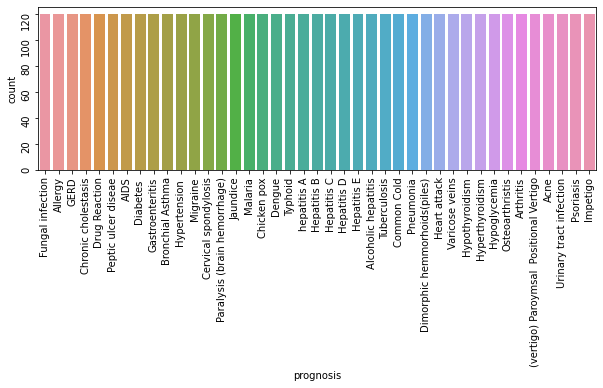

In [12]:
plt.figure(figsize = (10,3))
plt.tick_params(rotation = 90)
sns.countplot(x=train_data["prognosis"])

In [ ]:
sns.pairplot(train_data)

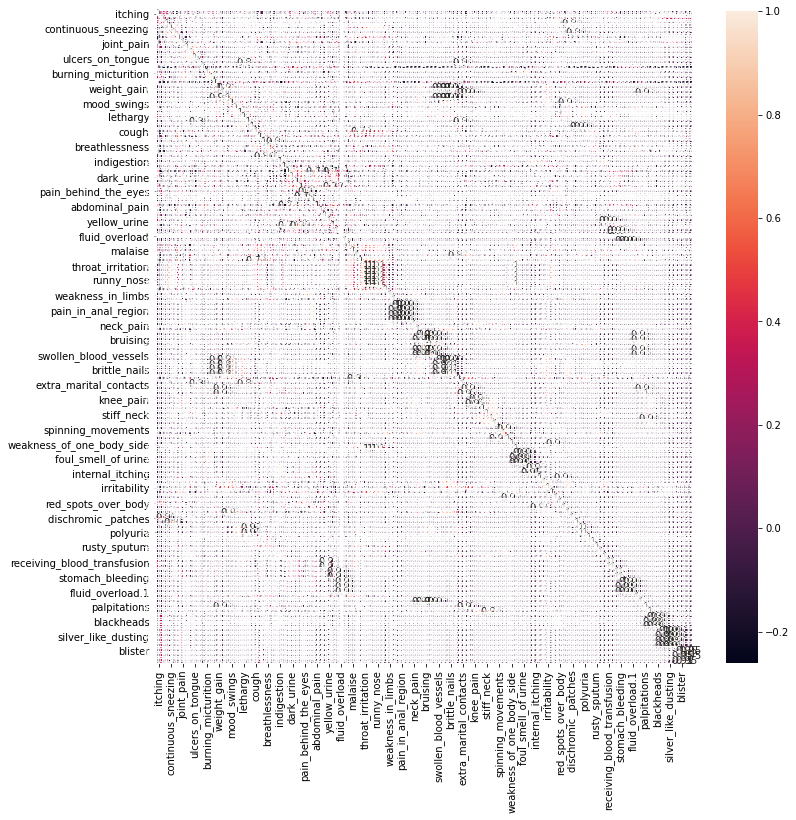

In [13]:
plt.figure(figsize= (12,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

### Separating the Input and Target Variables

In [16]:
Input_train = train_data.drop("prognosis",axis = 1)
Output_train = train_data["prognosis"]
Input_test = test_data.drop("prognosis",axis = 1)
Output_test = test_data["prognosis"]

## Logistic Regression

In [17]:
lr = LogisticRegression(max_iter = 200)
lr.fit(Input_train,Output_train)
lr_score = lr.score(Input_test,Output_test)
Y_pred = lr.predict(Input_test)
df = pd.DataFrame({"Actual":Output_test,"Predicted":Y_pred})
df.head()

,Actual,Predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction


### Decision Tree Classifier

In [18]:
dt = DecisionTreeClassifier()
dt.fit(Input_train,Output_train)
dt_score = dt.score(Input_test,Output_test)
Y_pred = dt.predict(Input_test)
df = pd.DataFrame({"Actual":Output_test,"Predicted":Y_pred})
df.head()

,Actual,Predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction


### Random Forest Classifier

In [19]:
rf = RandomForestClassifier()
rf.fit(Input_train,Output_train)
rf_score = rf.score(Input_test,Output_test)
Y_pred = rf.predict(Input_test)
df = pd.DataFrame({"Actual":Output_test,"Predicted":Y_pred})
df.head()

,Actual,Predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction


## Accuracies of all models

In [20]:
print("Logistic Regression Accuracy on Test Data",str(lr_score*100))
print("Decision Tree Classifier Accuracy on Test Data",str(dt_score*100))
print("Random Forest Classifier Accuracy on Test Data",str(rf_score*100))



Logistic Regression Accuracy on Test Data 100.0
Decision Tree Classifier Accuracy on Test Data 97.61904761904762
Random Forest Classifier Accuracy on Test Data 97.61904761904762


<BarContainer object of 3 artists>

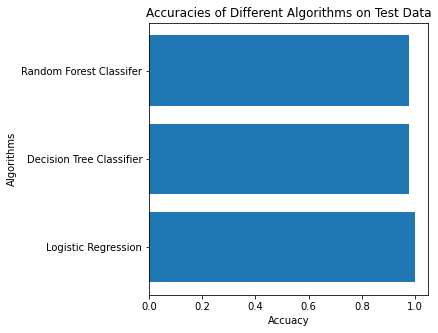

In [21]:
accuracy = [lr_score,dt_score,rf_score]
models = ["Logistic Regression","Decision Tree Classifier","Random Forest Classifer"]
plt.figure(figsize = (5,5))
plt.yticks(np.arange(len(accuracy)),models)
plt.xlabel("Accuacy")
plt.ylabel("Algorithms")
plt.title("Accuracies of Different Algorithms on Test Data")
plt.barh(np.arange(len(accuracy)),accuracy)
